# Exploratory Data Analysis

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv('customer_data.csv')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   MonthlyCharges  200 non-null    float64
 5   TotalCharges    200 non-null    float64
 6   PaymentMethod   200 non-null    object 
 7   Churn           200 non-null    object 
 8   ServiceUsage1   200 non-null    int64  
 9   ServiceUsage2   200 non-null    int64  
 10  ServiceUsage3   200 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


In [215]:
#Checking for missing values
print(df.isnull().sum()) 

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64


##### The output shows that there is no missing data in the dataset

In [216]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,99.000000,49.000000,198.000000


In [217]:
Q1 = df['ServiceUsage3'].quantile(0.25)
Q3 = df['ServiceUsage3'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ServiceUsage3'] < lower_bound) | (df['ServiceUsage3'] > upper_bound)]
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)


lower bound: -102.0
upper bound: 316.0


#### There are no outliers in ServiceUsage3. Similarly, there are no outliers in the entire dataset.

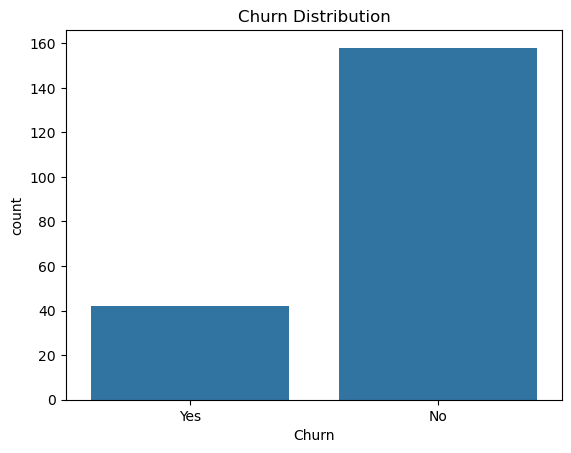

In [218]:
# Univarient Analysis
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

##### The churn distribution shows 40 "Yes" and 160 "No" indicates that in the dataset, only a small proportion of customers have canceled their subscription, while the majority are still active.

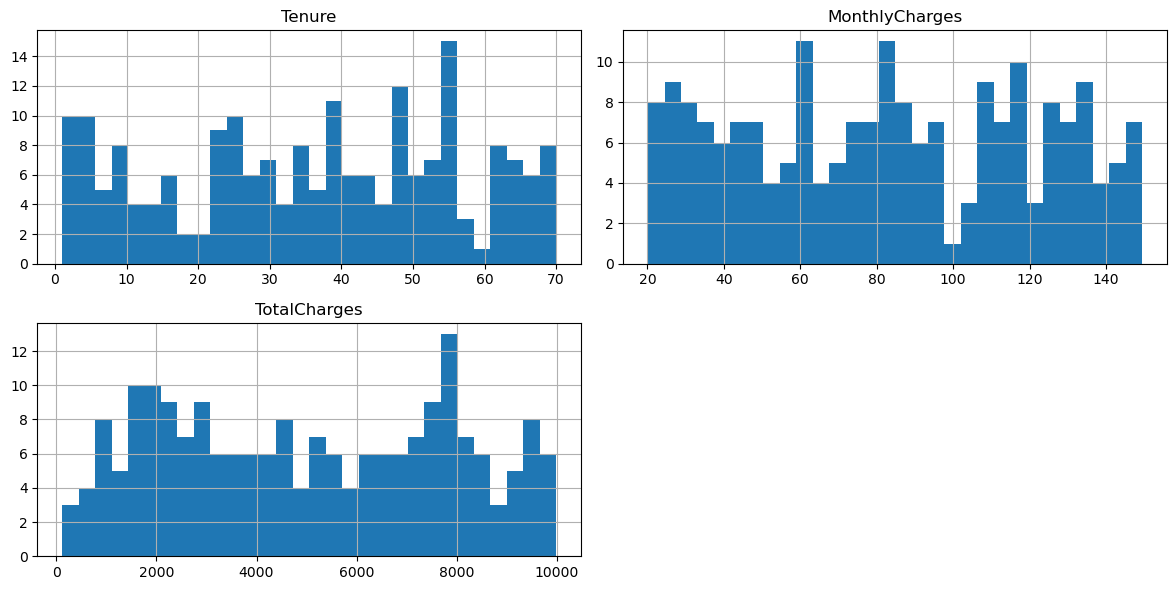

In [219]:
# Ploting histograms for numerical variables
df[['Tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

##### 1. Tenure: The histogram shows customer tenure distribution, with high churn in early months and notable spikes around 50-60 months, indicating potential retention milestones.

##### 2. MonthlyCharges: The histogram shows a multi-modal distribution of monthly charges, with peaks around $60, $90, and $120, indicating popular pricing tiers. Customers are distributed across low and high charge ranges, suggesting distinct service preferences.

##### 3. Total Charge: The histogram of Total Charges shows a varied distribution, with peaks around $2000 and $8000, indicating customer clusters with moderate and high cumulative spending. Higher total charges suggest long-term customers.

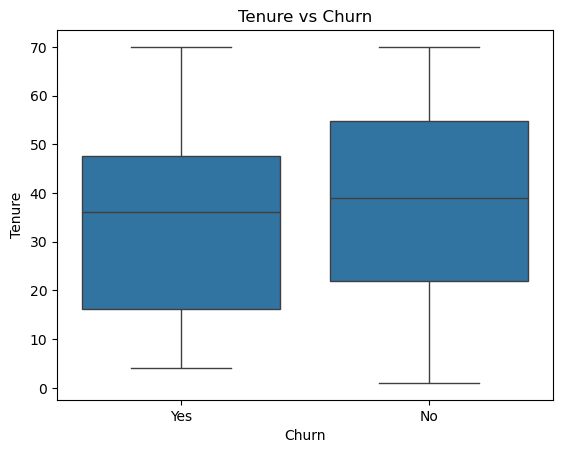

In [220]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

#### The boxplot shows that customers who churn tend to have shorter tenures compared to those who stay. The median tenure for non-churned customers is higher, indicating longer retention among loyal customers.

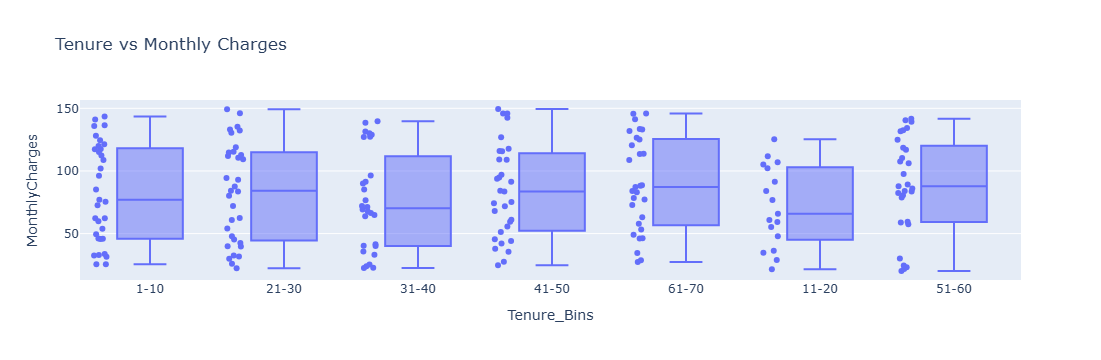

In [221]:
# Tenure vs Monthly Charge
import plotly.express as px
df['Tenure_Bins'] = pd.cut(df['Tenure'], bins=[0, 10, 20, 30, 40, 50, 60, 70], labels=['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
fig = px.box(df, x="Tenure_Bins", y="MonthlyCharges", points="all", title="Tenure vs Monthly Charges")
fig.show()

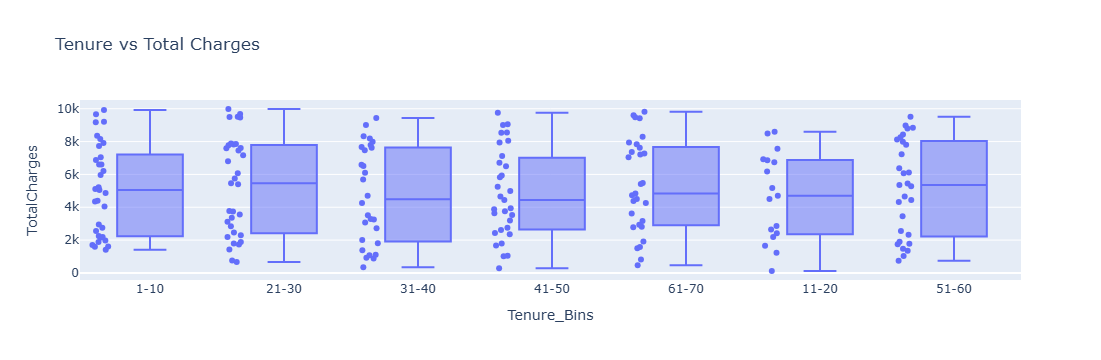

In [222]:
# Tenure vs Total Charge
import plotly.express as px
df['Tenure_Bins'] = pd.cut(df['Tenure'], bins=[0, 10, 20, 30, 40, 50, 60, 70], labels=['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
fig = px.box(df, x="Tenure_Bins", y="TotalCharges", points="all", title="Tenure vs Total Charges")
fig.show()

In [226]:
df=df.drop(columns=["Tenure_Bins"])

# Feature Engineering

In [227]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [228]:
df['AvgSpendPerMonth'] = df['TotalCharges'] / (df['Tenure'] + 1)

In [229]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male: 1, Female: 0
df["Churn"] = le.fit_transform(df["Churn"])    # Yes: 1, No: 0

In [230]:
#One hot encoding for "PaymentMethod" Column
df = pd.get_dummies(df, columns=["PaymentMethod"], drop_first=True)

In [231]:
num_cols = ["Age", "Tenure", "MonthlyCharges", "TotalCharges", 
            "ServiceUsage1", "ServiceUsage2", "ServiceUsage3", 
            "AvgSpendPerMonth"]

In [232]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [233]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,AvgSpendPerMonth,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,CUST0001,1,-1.484979,-1.527311,-0.546301,-0.747861,1,0.303786,-0.325171,-0.761761,0.455930,False,True,False
1,CUST0002,0,-1.153659,-0.638909,0.951290,0.865549,0,-0.289819,1.129268,0.499204,0.054993,False,False,False
2,CUST0003,0,-1.153659,0.150782,-0.364158,-0.706965,0,0.513293,-1.710351,1.000136,-0.464220,False,False,False
3,CUST0004,1,0.900530,0.545627,1.663473,-0.868841,0,0.478375,1.060009,1.069230,-0.513422,True,False,False
4,CUST0005,0,-0.623546,1.631452,0.146319,-0.074049,0,0.408539,-1.641092,-0.917223,-0.480980,True,False,False


In [234]:
X= df.drop(columns=["CustomerID", "Churn"])  # Drop irrelevant columns
y = df["Churn"]

# Predective Modeling

In [235]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [237]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (160, 12)
Test set size: (40, 12)


In [238]:
print("Churn distribution in Training Set:")
print(y_train.value_counts(normalize=True))

Churn distribution in Training Set:
Churn
0    0.79375
1    0.20625
Name: proportion, dtype: float64


In [239]:
print("Churn distribution in Test Set:")
print(y_test.value_counts(normalize=True))

Churn distribution in Test Set:
Churn
0    0.775
1    0.225
Name: proportion, dtype: float64


In [240]:
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
Support_Vector_Machine= SVC(probability=True, random_state=42)

In [241]:
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
Support_Vector_Machine.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [242]:
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
Support_Vector_preds= Support_Vector_Machine.predict(X_test)

In [243]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model, model_name):
    print(f"Evaluation for {model_name}:")
    
    # ROC-AUC Score
    
    y_probs = model.predict_proba(X_test)[:, 1]
    print("ROC-AUC Score:", roc_auc_score(y_true, y_probs))
    
    
    # Classification report
    print("\nClassification Report:\n", classification_report(y_true, y_pred,zero_division=1))
    print("-" * 55)

# Logistic Regression
evaluate_model(y_test, logistic_preds, logistic_model, "Logistic Regression")

# Decision Tree
evaluate_model(y_test, decision_tree_preds, decision_tree_model, "Decision Tree")

# Random Forest
evaluate_model(y_test, random_forest_preds, random_forest_model, "Random Forest")

# Support Vector Machine
evaluate_model(y_test, Support_Vector_preds, Support_Vector_Machine, "Support Vector Machine")

Evaluation for Logistic Regression:
ROC-AUC Score: 0.6200716845878137

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        31
           1       0.50      0.11      0.18         9

    accuracy                           0.78        40
   macro avg       0.64      0.54      0.53        40
weighted avg       0.72      0.78      0.71        40

-------------------------------------------------------
Evaluation for Decision Tree:
ROC-AUC Score: 0.5053763440860215

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.23      0.33      0.27         9

    accuracy                           0.60        40
   macro avg       0.50      0.51      0.50        40
weighted avg       0.65      0.60      0.62        40

-------------------------------------------------------
Evaluation for Random Forest:
ROC-AUC Score: 0.396

#### The Decision Tree performs best overall, considering its ability to predict the minority class (1) with a recall of 0.33, even though its overall metrics (ROC-AUC and accuracy) are not the highest. The other models (especially SVM and Random Forest) perform poorly in predicting the minority class.

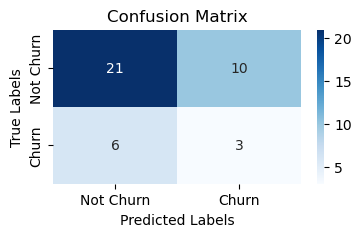

In [268]:
# Confusion Metrix For best model
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Model Interpretation

In [245]:
import shap

  0%|          | 0/40 [00:00<?, ?it/s]

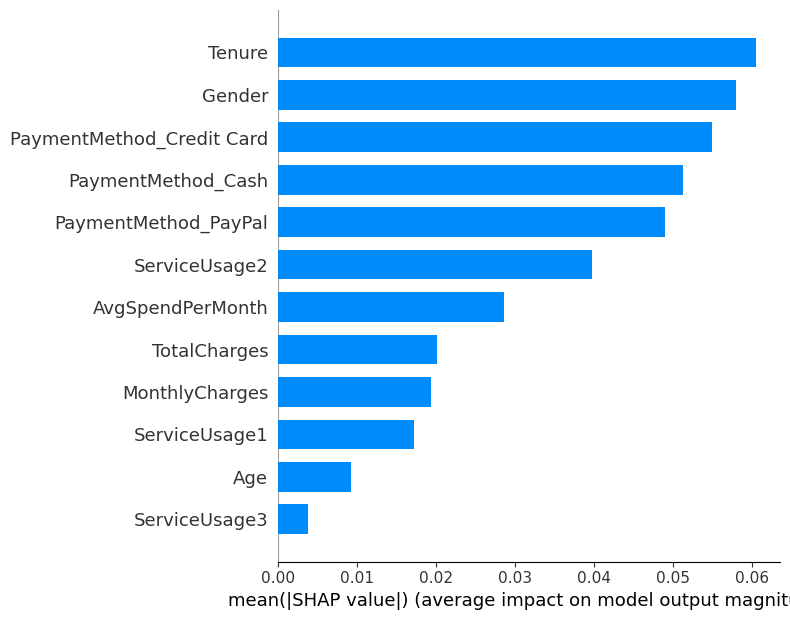

In [246]:
# Ensure the model outputs probabilities
def predict_proba_wrapper(X):
    return logistic_model.predict_proba(pd.DataFrame(X, columns=X_train.columns))[:, 1]

# Reduce the background sample size for efficiency
background = shap.sample(X_train, 50)  # Sample 50 rows from training data

# Create SHAP Kernel Explainer
explainer = shap.KernelExplainer(predict_proba_wrapper, background)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test, nsamples=100)  # Adjust nsamples if computation is slow

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


#### The factor that contributed the most to churn is Tenure. This suggests that how long a customer has been with the service (Tenure) has a strong influence on whether they churn.

# Recommendation Engine

#### To build the recommendation engine, we will focus on the ServiceUsage1, ServiceUsage2, and ServiceUsage3 columns, treating them as products/services.

In [247]:
from sklearn.metrics.pairwise import cosine_similarity

In [251]:
# Transforming the data into a user-item-matrix using the CustomerID and service usage columns.
usage_columns = ['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']
user_item_matrix = df[['CustomerID'] + usage_columns].set_index('CustomerID')
print(user_item_matrix.head())

            ServiceUsage1  ServiceUsage2  ServiceUsage3
CustomerID                                             
CUST0001         0.303786      -0.325171      -0.761761
CUST0002        -0.289819       1.129268       0.499204
CUST0003         0.513293      -1.710351       1.000136
CUST0004         0.478375       1.060009       1.069230
CUST0005         0.408539      -1.641092      -0.917223


In [254]:
customer_similarity = cosine_similarity(user_item_matrix)
customer_similarity_df = pd.DataFrame(customer_similarity, 
                                      index=user_item_matrix.index, 
                                      columns=user_item_matrix.index)

print(customer_similarity_df.head())

CustomerID  CUST0001  CUST0002  CUST0003  CUST0004  CUST0005  CUST0006  \
CustomerID                                                               
CUST0001    1.000000 -0.746759 -0.027568 -0.727454  0.799185  0.977846   
CUST0002   -0.746759  1.000000 -0.609050  0.794667 -0.995714 -0.868298   
CUST0003   -0.027568 -0.609050  1.000000 -0.154039  0.533106  0.178164   
CUST0004   -0.727454  0.794667 -0.154039  1.000000 -0.830726 -0.774523   
CUST0005    0.799185 -0.995714  0.533106 -0.830726  1.000000  0.904948   

CustomerID  CUST0007  CUST0008  CUST0009  CUST0010  ...  CUST0191  CUST0192  \
CustomerID                                          ...                       
CUST0001    0.398314  0.916239  0.359619  0.806348  ... -0.809586 -0.220250   
CUST0002   -0.889743 -0.803869 -0.041859 -0.492231  ...  0.669880  0.743219   
CUST0003    0.761572  0.259958 -0.611382  0.003588  ... -0.256403 -0.676228   
CUST0004   -0.752227 -0.529560 -0.630146 -0.198923  ...  0.294670  0.741587   
CUST000

In [267]:
def recommend_services(customer_id, user_item_matrix, customer_similarity_df, top_n=3):
    
    if customer_id not in customer_similarity_df.index:
        return f"Customer ID {customer_id} not found in data."

    # Get similarity scores for the target customer
    similar_customers = customer_similarity_df[customer_id].sort_values(ascending=False)[1:top_n+1]

    # Get services used by the similar customers
    similar_customers_services = user_item_matrix.loc[similar_customers.index]

    # Aggregate usage across similar customers and exclude already used services
    target_customer_services = user_item_matrix.loc[customer_id]
    recommended_services = similar_customers_services.sum(axis=0) - target_customer_services

    # Sort recommendations by usage frequency and return as a list
    recommendations = recommended_services[recommended_services > 0].sort_values(ascending=False).index.tolist()
    return recommendations
    
# Add a column for recommended services for all customers
df['RecommendedServices'] = df['CustomerID'].apply(
    lambda customer_id: recommend_services(customer_id, user_item_matrix, customer_similarity_df)
)

# Display the updated dataset with recommended services
#df[['CustomerID', 'RecommendedServices']].head()
# Example: Recommend services for customer 'CUST0001'
recommend_services("CUST0001", user_item_matrix, customer_similarity_df)


['ServiceUsage1']